<a href="https://colab.research.google.com/github/codingCapricorn/MCMC-Algorithm-Implementation/blob/master/Random_Walk_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Walk Monte Carlo ::::

Consider a random walk on 2D lattice. It forms a Markov chain $\{X_i\}_{i=1}^{n}$ on $\mathbb{Z} \times \mathbb{Z}$ with $X_0=0$ and transition probabilities given by



$P(X_i = (k,l) | X_{i-1} = (i,j)) = 
\begin{cases} 
1/4, if |k-i| + |l-j| = 1\\
0, \mathrm{otherwise}
\end{cases}$



We assume a uniform transition probability propotional to one over the number of unoccupied neighbors of a given node. Self-avoiding random walks are simply random walks that do not cross themselves. We can use monte carlo to simulate a self-avoiding random walk.

In [ ]:
%matplotlib inline 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#1.With small difference number of steps and iterations -->>

In [ ]:
num_step = 64 #number of steps in a random walk
num_iter = 16  #number of iterations for averaging results
moves = np.array([[0, 1],[0, -1],[-1, 0],[1, 0]]) #2-D moves
    
#random walk stats
square_dist = np.zeros(num_iter)
weights = np.zeros(num_iter)
        
for it in range(num_iter):
        
    trial = 0
    i = 1
        
    #iterate until we have a non-crossing random walk
    while i != num_step-1:
            
        #init
        X, Y = 0, 0
        weight = 1
        lattice = np.zeros((2*num_step+1, 2*num_step+1))
        lattice[num_step+1,num_step+1] = 1
        path = np.array([0, 0])
        xx = num_step + 1 + X
        yy = num_step + 1 + Y
            
        print("iter: %d, trial %d" %(it, trial))
            
        for i in range(num_step):
                
            up    = lattice[xx,yy+1]
            down  = lattice[xx,yy-1]
            left  = lattice[xx-1,yy]
            right = lattice[xx+1,yy]
                
            #compute available directions
            neighbors = np.array([1, 1, 1, 1]) - np.array([up, down, left, right])
                
            #avoid self-loops
            if (np.sum(neighbors) == 0):
                i = 1
                break
            #end if
                
            #compute importance weights: d0 x d1 x ... x d_{n-1}
            weight = weight * np.sum(neighbors)
                
            #sample a move direction
            direction = np.where(np.random.rand() < np.cumsum(neighbors/float(sum(neighbors))))
                
            X = X + moves[direction[0][0],0]
            Y = Y + moves[direction[0][0],1]
                
            #store sampled path
            path_new = np.array([X,Y])
            path = np.vstack((path,path_new))
                
            #update grid coordinates
            xx = num_step + 1 + X
            yy = num_step + 1 + Y                  
            lattice[xx,yy] = 1                                                                                                                                            
        #end for
            
        trial = trial + 1
    #end while                                
        
    #compute square extension
    square_dist[it] = X**2 + Y**2
        
    #store importance weights
    weights[it] = weight                                                        
#end for

iter: 0, trial 0
iter: 1, trial 0
iter: 1, trial 1
iter: 2, trial 0
iter: 2, trial 1
iter: 2, trial 2
iter: 3, trial 0
iter: 3, trial 1
iter: 4, trial 0
iter: 5, trial 0
iter: 5, trial 1
iter: 5, trial 2
iter: 6, trial 0
iter: 6, trial 1
iter: 6, trial 2
iter: 6, trial 3
iter: 7, trial 0
iter: 7, trial 1
iter: 8, trial 0
iter: 9, trial 0
iter: 9, trial 1
iter: 9, trial 2
iter: 10, trial 0
iter: 10, trial 1
iter: 10, trial 2
iter: 10, trial 3
iter: 11, trial 0
iter: 12, trial 0
iter: 13, trial 0
iter: 14, trial 0
iter: 14, trial 1
iter: 14, trial 2
iter: 15, trial 0
iter: 15, trial 1


In [ ]:
#compute mean square extension
mean_square_dist = np.mean(weights * square_dist)/np.mean(weights)
print("mean square dist: ", mean_square_dist)

mean square dist:  162.53621626921597


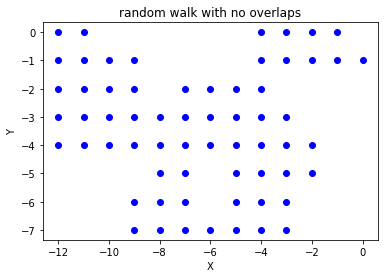

In [ ]:
#generate plots
plt.figure()
for i in range(num_step-1):
    plt.plot(path[i,0], path[i,1], path[i+1,0], path[i+1,1], 'ob')            
plt.title('random walk with no overlaps')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

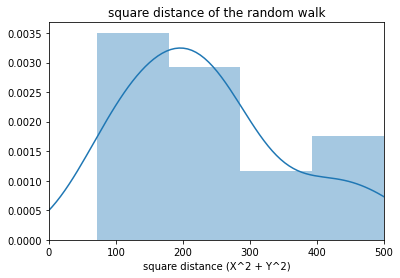

In [ ]:
plt.figure()
sns.distplot(square_dist)
plt.xlim(0,np.max(square_dist))
plt.title('square distance of the random walk')
plt.xlabel('square distance (X^2 + Y^2)')
plt.show()

#2.With large difference number of steps and iterations -->>

In [ ]:
num_step = 164 #number of steps in a random walk
num_iter = 16  #number of iterations for averaging results
moves = np.array([[0, 1],[0, -1],[-1, 0],[1, 0]]) #2-D moves
    
#random walk stats
square_dist = np.zeros(num_iter)
weights = np.zeros(num_iter)
        
for it in range(num_iter):
        
    trial = 0
    i = 1
        
    #iterate until we have a non-crossing random walk
    while i != num_step-1:
            
        #init
        X, Y = 0, 0
        weight = 1
        lattice = np.zeros((2*num_step+1, 2*num_step+1))
        lattice[num_step+1,num_step+1] = 1
        path = np.array([0, 0])
        xx = num_step + 1 + X
        yy = num_step + 1 + Y
            
        print("iter: %d, trial %d" %(it, trial))
            
        for i in range(num_step):
                
            up    = lattice[xx,yy+1]
            down  = lattice[xx,yy-1]
            left  = lattice[xx-1,yy]
            right = lattice[xx+1,yy]
                
            #compute available directions
            neighbors = np.array([1, 1, 1, 1]) - np.array([up, down, left, right])
                
            #avoid self-loops
            if (np.sum(neighbors) == 0):
                i = 1
                break
            #end if
                
            #compute importance weights: d0 x d1 x ... x d_{n-1}
            weight = weight * np.sum(neighbors)
                
            #sample a move direction
            direction = np.where(np.random.rand() < np.cumsum(neighbors/float(sum(neighbors))))
                
            X = X + moves[direction[0][0],0]
            Y = Y + moves[direction[0][0],1]
                
            #store sampled path
            path_new = np.array([X,Y])
            path = np.vstack((path,path_new))
                
            #update grid coordinates
            xx = num_step + 1 + X
            yy = num_step + 1 + Y                  
            lattice[xx,yy] = 1                                                                                                                                            
        #end for
            
        trial = trial + 1
    #end while                                
        
    #compute square extension
    square_dist[it] = X**2 + Y**2
        
    #store importance weights
    weights[it] = weight                                                        
#end for

iter: 0, trial 0
iter: 0, trial 1
iter: 1, trial 0
iter: 1, trial 1
iter: 1, trial 2
iter: 1, trial 3
iter: 2, trial 0
iter: 2, trial 1
iter: 2, trial 2
iter: 2, trial 3
iter: 2, trial 4
iter: 2, trial 5
iter: 2, trial 6
iter: 2, trial 7
iter: 2, trial 8
iter: 2, trial 9
iter: 2, trial 10
iter: 2, trial 11
iter: 2, trial 12
iter: 2, trial 13
iter: 2, trial 14
iter: 2, trial 15
iter: 2, trial 16
iter: 2, trial 17
iter: 2, trial 18
iter: 2, trial 19
iter: 2, trial 20
iter: 2, trial 21
iter: 2, trial 22
iter: 2, trial 23
iter: 2, trial 24
iter: 2, trial 25
iter: 2, trial 26
iter: 2, trial 27
iter: 2, trial 28
iter: 2, trial 29
iter: 2, trial 30
iter: 2, trial 31
iter: 2, trial 32
iter: 2, trial 33
iter: 2, trial 34
iter: 2, trial 35
iter: 2, trial 36
iter: 2, trial 37
iter: 2, trial 38
iter: 2, trial 39
iter: 2, trial 40
iter: 2, trial 41
iter: 2, trial 42
iter: 2, trial 43
iter: 2, trial 44
iter: 2, trial 45
iter: 2, trial 46
iter: 2, trial 47
iter: 2, trial 48
iter: 2, trial 49
iter: 2,

In [ ]:
#compute mean square extension
mean_square_dist = np.mean(weights * square_dist)/np.mean(weights)
print("mean square dist: ", mean_square_dist)

mean square dist:  1192.856518674526


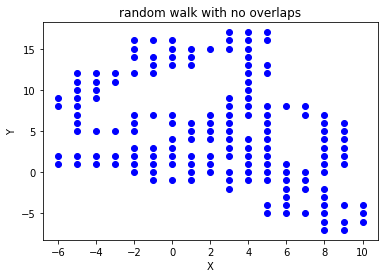

In [ ]:
#generate plots
plt.figure()
for i in range(num_step-1):
    plt.plot(path[i,0], path[i,1], path[i+1,0], path[i+1,1], 'ob')            
plt.title('random walk with no overlaps')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

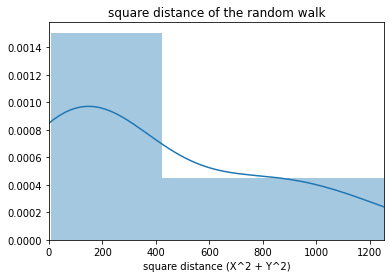

In [ ]:
plt.figure()
sns.distplot(square_dist)
plt.xlim(0,np.max(square_dist))
plt.title('square distance of the random walk')
plt.xlabel('square distance (X^2 + Y^2)')
plt.show()

#3.With large number of iterations -->>

In [ ]:
num_step = 64 #number of steps in a random walk
num_iter = 50  #number of iterations for averaging results
moves = np.array([[0, 1],[0, -1],[-1, 0],[1, 0]]) #2-D moves
    
#random walk stats
square_dist = np.zeros(num_iter)
weights = np.zeros(num_iter)
        
for it in range(num_iter):
        
    trial = 0
    i = 1
        
    #iterate until we have a non-crossing random walk
    while i != num_step-1:
            
        #init
        X, Y = 0, 0
        weight = 1
        lattice = np.zeros((2*num_step+1, 2*num_step+1))
        lattice[num_step+1,num_step+1] = 1
        path = np.array([0, 0])
        xx = num_step + 1 + X
        yy = num_step + 1 + Y
            
        print("iter: %d, trial %d" %(it, trial))
            
        for i in range(num_step):
                
            up    = lattice[xx,yy+1]
            down  = lattice[xx,yy-1]
            left  = lattice[xx-1,yy]
            right = lattice[xx+1,yy]
                
            #compute available directions
            neighbors = np.array([1, 1, 1, 1]) - np.array([up, down, left, right])
                
            #avoid self-loops
            if (np.sum(neighbors) == 0):
                i = 1
                break
            #end if
                
            #compute importance weights: d0 x d1 x ... x d_{n-1}
            weight = weight * np.sum(neighbors)
                
            #sample a move direction
            direction = np.where(np.random.rand() < np.cumsum(neighbors/float(sum(neighbors))))
                
            X = X + moves[direction[0][0],0]
            Y = Y + moves[direction[0][0],1]
                
            #store sampled path
            path_new = np.array([X,Y])
            path = np.vstack((path,path_new))
                
            #update grid coordinates
            xx = num_step + 1 + X
            yy = num_step + 1 + Y                  
            lattice[xx,yy] = 1                                                                                                                                            
        #end for
            
        trial = trial + 1
    #end while                                
        
    #compute square extension
    square_dist[it] = X**2 + Y**2
        
    #store importance weights
    weights[it] = weight                                                        
#end for

iter: 0, trial 0
iter: 0, trial 1
iter: 0, trial 2
iter: 0, trial 3
iter: 0, trial 4
iter: 1, trial 0
iter: 1, trial 1
iter: 1, trial 2
iter: 2, trial 0
iter: 2, trial 1
iter: 2, trial 2
iter: 2, trial 3
iter: 2, trial 4
iter: 3, trial 0
iter: 4, trial 0
iter: 5, trial 0
iter: 6, trial 0
iter: 7, trial 0
iter: 7, trial 1
iter: 7, trial 2
iter: 7, trial 3
iter: 8, trial 0
iter: 8, trial 1
iter: 9, trial 0
iter: 9, trial 1
iter: 10, trial 0
iter: 11, trial 0
iter: 11, trial 1
iter: 11, trial 2
iter: 12, trial 0
iter: 12, trial 1
iter: 13, trial 0
iter: 13, trial 1
iter: 13, trial 2
iter: 13, trial 3
iter: 13, trial 4
iter: 14, trial 0
iter: 15, trial 0
iter: 15, trial 1
iter: 16, trial 0
iter: 16, trial 1
iter: 16, trial 2
iter: 17, trial 0
iter: 17, trial 1
iter: 18, trial 0
iter: 19, trial 0
iter: 19, trial 1
iter: 20, trial 0
iter: 20, trial 1
iter: 21, trial 0
iter: 22, trial 0
iter: 22, trial 1
iter: 22, trial 2
iter: 22, trial 3
iter: 23, trial 0
iter: 23, trial 1
iter: 24, trial 0

In [ ]:
#compute mean square extension
mean_square_dist = np.mean(weights * square_dist)/np.mean(weights)
print("mean square dist: ", mean_square_dist)

mean square dist:  308.25486325737234


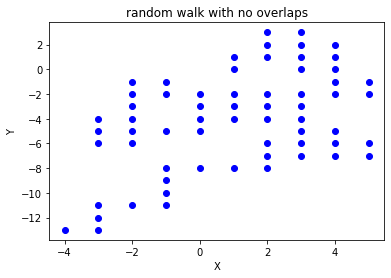

In [ ]:
#generate plots
plt.figure()
for i in range(num_step-1):
    plt.plot(path[i,0], path[i,1], path[i+1,0], path[i+1,1], 'ob')            
plt.title('random walk with no overlaps')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

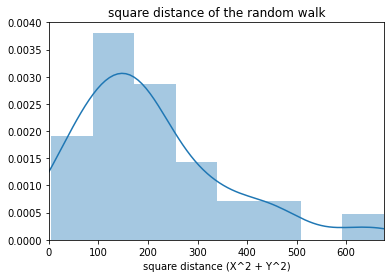

In [ ]:
plt.figure()
sns.distplot(square_dist)
plt.xlim(0,np.max(square_dist))
plt.title('square distance of the random walk')
plt.xlabel('square distance (X^2 + Y^2)')
plt.show()

#4.Steps are smaller than iterations -->>

In [ ]:
num_step = 10 #number of steps in a random walk
num_iter = 20  #number of iterations for averaging results
moves = np.array([[0, 1],[0, -1],[-1, 0],[1, 0]]) #2-D moves
    
#random walk stats
square_dist = np.zeros(num_iter)
weights = np.zeros(num_iter)
        
for it in range(num_iter):
        
    trial = 0
    i = 1
        
    #iterate until we have a non-crossing random walk
    while i != num_step-1:
            
        #init
        X, Y = 0, 0
        weight = 1
        lattice = np.zeros((2*num_step+1, 2*num_step+1))
        lattice[num_step+1,num_step+1] = 1
        path = np.array([0, 0])
        xx = num_step + 1 + X
        yy = num_step + 1 + Y
            
        print("iter: %d, trial %d" %(it, trial))
            
        for i in range(num_step):
                
            up    = lattice[xx,yy+1]
            down  = lattice[xx,yy-1]
            left  = lattice[xx-1,yy]
            right = lattice[xx+1,yy]
                
            #compute available directions
            neighbors = np.array([1, 1, 1, 1]) - np.array([up, down, left, right])
                
            #avoid self-loops
            if (np.sum(neighbors) == 0):
                i = 1
                break
            #end if
                
            #compute importance weights: d0 x d1 x ... x d_{n-1}
            weight = weight * np.sum(neighbors)
                
            #sample a move direction
            direction = np.where(np.random.rand() < np.cumsum(neighbors/float(sum(neighbors))))
                
            X = X + moves[direction[0][0],0]
            Y = Y + moves[direction[0][0],1]
                
            #store sampled path
            path_new = np.array([X,Y])
            path = np.vstack((path,path_new))
                
            #update grid coordinates
            xx = num_step + 1 + X
            yy = num_step + 1 + Y                  
            lattice[xx,yy] = 1                                                                                                                                            
        #end for
            
        trial = trial + 1
    #end while                                
        
    #compute square extension
    square_dist[it] = X**2 + Y**2
        
    #store importance weights
    weights[it] = weight                                                        
#end for

iter: 0, trial 0
iter: 0, trial 1
iter: 1, trial 0
iter: 2, trial 0
iter: 3, trial 0
iter: 4, trial 0
iter: 5, trial 0
iter: 6, trial 0
iter: 6, trial 1
iter: 7, trial 0
iter: 8, trial 0
iter: 9, trial 0
iter: 10, trial 0
iter: 11, trial 0
iter: 11, trial 1
iter: 12, trial 0
iter: 13, trial 0
iter: 14, trial 0
iter: 15, trial 0
iter: 16, trial 0
iter: 17, trial 0
iter: 18, trial 0
iter: 19, trial 0


In [ ]:
#compute mean square extension
mean_square_dist = np.mean(weights * square_dist)/np.mean(weights)
print("mean square dist: ", mean_square_dist)

mean square dist:  25.95127610208817


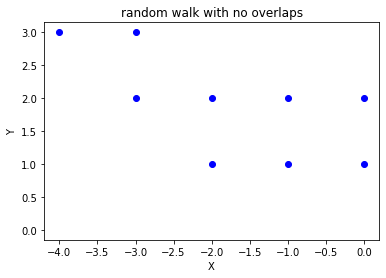

In [ ]:
#generate plots
plt.figure()
for i in range(num_step-1):
    plt.plot(path[i,0], path[i,1], path[i+1,0], path[i+1,1], 'ob')            
plt.title('random walk with no overlaps')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

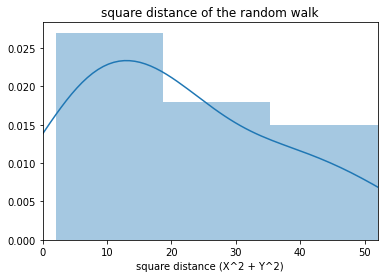

In [ ]:
plt.figure()
sns.distplot(square_dist)
plt.xlim(0,np.max(square_dist))
plt.title('square distance of the random walk')
plt.xlabel('square distance (X^2 + Y^2)')
plt.show()

Here,random forest monte carlo with simple application is implemented.